In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data_path = 'D:\\MSc in IT\\2nd yr 1st sem\\ML\\Assigment 2\\archive\\spotify-2023.csv'
spotify_data = pd.read_csv(data_path, encoding='latin')
print('Data dimensions:', spotify_data.shape)

Data dimensions: (953, 24)


In [3]:
# Displaying basic statistics
spotify_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
# One-hot encoding for categorical variables
encoded_data = pd.get_dummies(spotify_data)

In [5]:
# Splitting the data into features and labels
labels_array = np.array(encoded_data['artist_count'])
encoded_data = encoded_data.drop('artist_count', axis=1)
features_list = list(encoded_data.columns)
features_array = np.array(encoded_data)

In [6]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features_array, labels_array, test_size=0.25, random_state=42)

# Displaying shapes
print('Train Features Shape:', train_features.shape)
print('Test Features Shape:', test_features.shape)
print('Train Labels Shape:', train_labels.shape)
print('Test Labels Shape:', test_labels.shape)

Train Features Shape: (714, 3112)
Test Features Shape: (239, 3112)
Train Labels Shape: (714,)
Test Labels Shape: (239,)


In [7]:
# Baseline prediction
baseline_prediction = test_features[:, features_list.index('in_spotify_charts')]
baseline_diff = abs(baseline_prediction - test_labels)
print('Average baseline difference: ', round(np.mean(baseline_diff), 2))

Average baseline difference:  11.69


In [8]:
# Training the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
forest_model.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [9]:
# Training the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
forest_model.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [10]:
# Making predictions
predicted_values = forest_model.predict(test_features)
prediction_errors = abs(predicted_values - test_labels)
print('Mean Absolute Error:', round(np.mean(prediction_errors), 2))

Mean Absolute Error: 0.56


In [11]:
# Calculating accuracy
error_percentage = 100 * (prediction_errors / test_labels)
model_accuracy = 100 - np.mean(error_percentage)
print('Model Accuracy:', round(model_accuracy, 2), '%.')

Model Accuracy: 66.23 %.


In [12]:
# Visualizing actual vs predicted values
dates_data = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(features_array[:, features_list.index('released_year')], features_array[:, features_list.index('released_month')], features_array[:, features_list.index('released_day')])]
formatted_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_data]
actual_data_frame = pd.DataFrame(data={'date': formatted_dates, 'actual': labels_array})

In [13]:
# Extracting test dates
test_dates_data = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(test_features[:, features_list.index('released_year')], test_features[:, features_list.index('released_month')], test_features[:, features_list.index('released_day')])]
test_formatted_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates_data]
predicted_data_frame = pd.DataFrame(data={'date': test_formatted_dates, 'prediction': predicted_values})


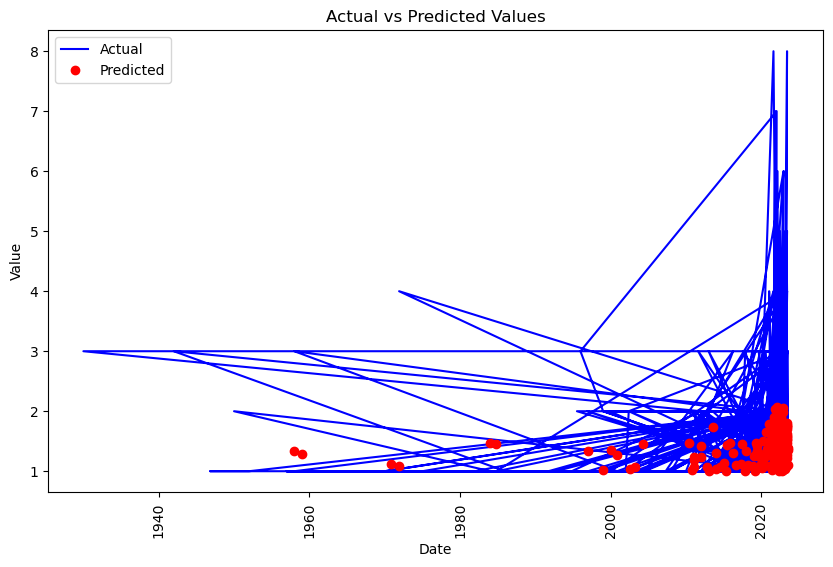

In [14]:
# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(actual_data_frame['date'], actual_data_frame['actual'], 'b-', label='Actual')
plt.plot(predicted_data_frame['date'], predicted_data_frame['prediction'], 'ro', label='Predicted')
plt.xticks(rotation='vertical')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()

In [15]:
# Feature importance
feature_significance = list(forest_model.feature_importances_)
sorted_features = [(feature, round(importance, 2)) for feature, importance in zip(features_list, feature_significance)]
sorted_features = sorted(sorted_features, key=lambda x: x[1], reverse=True)

for pair in sorted_features:
    print('Feature: {:20} Importance: {}'.format(*pair))


Feature: danceability_%       Importance: 0.07
Feature: energy_%             Importance: 0.04
Feature: released_day         Importance: 0.03
Feature: in_spotify_playlists Importance: 0.03
Feature: in_apple_charts      Importance: 0.03
Feature: speechiness_%        Importance: 0.03
Feature: artist(s)_name_Arcangel, De La Ghetto, Justin Quiles, Lenny Tavï¿½ï¿½rez, Sech, Dalex, Dimelo Flow, Rich Music Importance: 0.03
Feature: released_year        Importance: 0.02
Feature: released_month       Importance: 0.02
Feature: in_apple_playlists   Importance: 0.02
Feature: bpm                  Importance: 0.02
Feature: valence_%            Importance: 0.02
Feature: acousticness_%       Importance: 0.02
Feature: liveness_%           Importance: 0.02
Feature: track_name_Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Abhir Hathi, Bejo, EL IMA) Importance: 0.02
Feature: track_name_Los del Espacio Importance: 0.02
Feature: track_name_Se Le Ve  Importance: 0.02
Feature: artist(s)_name_Big One, Duki, Lit K

In [16]:
# Training a model with the most important features
focused_forest = RandomForestRegressor(n_estimators=1000, random_state=42)
key_features_indices = [features_list.index('danceability_%'), features_list.index('energy_%')]
train_key_features = train_features[:, key_features_indices]
test_key_features = test_features[:, key_features_indices]
focused_forest.fit(train_key_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [17]:
# Predictions using the focused model
focused_predictions = focused_forest.predict(test_key_features)
focused_errors = abs(focused_predictions - test_labels)
print('Focused Model MAE:', round(np.mean(focused_errors), 2))

Focused Model MAE: 0.68


In [18]:
# Calculating accuracy for the focused model
focused_error_percentage = np.mean(100 * (focused_errors / test_labels))
focused_accuracy = 100 - focused_error_percentage
print('Focused Model Accuracy:', round(focused_accuracy, 2), '%.')

Focused Model Accuracy: 53.8 %.
